** This notebook tries to investigate the large value by taking a look at the vertical profiles of velocity, S, T and the tracers.**

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import matplotlib.animation as animation
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
% matplotlib inline

nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/1try_oldbathy_1m_20020101_20021231_ptrc_T.nc', '/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/2nd_newbathy_1m_20020101_20021231_ptrc_T.nc', '/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/3rd_newbathy2003_1m_20030101_20031231_ptrc_T.nc']


#  preparing map

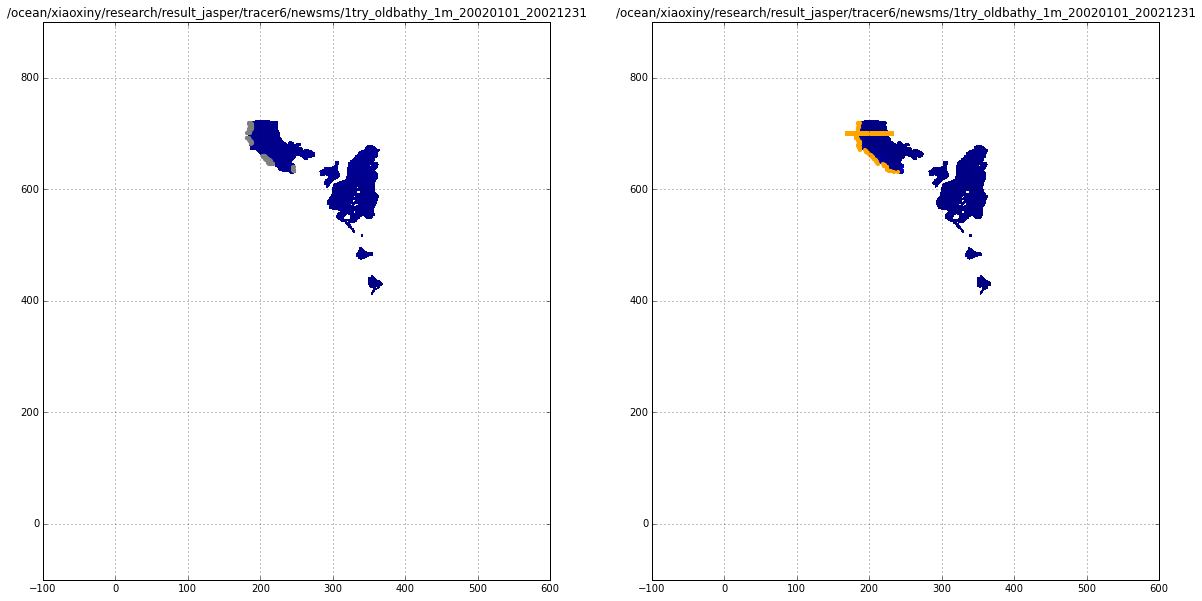

In [24]:
fig = plt.figure(figsize=(20,10))
for k in range (1):
    ptrc=nc.Dataset(nc_filename[k])
    TR_7=ptrc.variables['TR_7'][:,44,:,:]#[:,:,::10,:10]
    TR_7=np.ma.masked_where(TR_7<= 0, TR_7)
    TR_7=np.ma.masked_where(np.isnan(TR_7),TR_7)

    ii=[];jj=[];
    timestep=9
    for i in range (len(TR_7[0,:,0])):
        for j in range (len(TR_7[0,0,:])):
            if TR_7[timestep,i,j]>1:
                ii.append(i)
                jj.append(j)
    
    ax = fig.add_subplot(1,2,1)
    plt.pcolor(TR_7[timestep,:,:])
    plt.scatter(jj,ii,color='grey',s=10)
    plt.title('%s'%nc_filename[k][0:-10])
    plt.grid(True)
    
    
    ii=[];jj=[];
    timestep=-1
    for i in range (630,720):
        for j in range (len(TR_7[0,0,:])):
            if TR_7[timestep,i,j]>0:
                ii.append(i)
                jj.append(j)
                break
  
    ax = fig.add_subplot(1,2,2)
    plt.pcolor(TR_7[timestep,:,:])
    #plt.colorbar()
    plt.scatter(jj,ii,color='orange',s=10)
    ii=[700,700];jj=[170,230]
    plt.plot(jj,ii,color='orange',linewidth=5)
    plt.title('%s'%nc_filename[k][0:-10])
    plt.grid(True)
    
plt.show()

#  preparing variables

In [14]:
ptrc=nc.Dataset(nc_filename[0])
dep=ptrc.variables['deptht'][:]
nav_lon=ptrc.variables['nav_lon'][:]
nav_lat=ptrc.variables['nav_lat'][:]

ice=nc.Dataset('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/dyn_off/yearly/ANHA4-EXH001_gridT_y2002.nc')
S=ice.variables['vosaline'][0,:,:,:]
T=ice.variables['votemper'][0,:,:,:]

U=nc.Dataset('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/dyn_off/yearly/ANHA4-EXH001_gridU_y2002.nc')
U=U.variables['vozocrtx'][0,:,:,:]

V=nc.Dataset('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/dyn_off/yearly/ANHA4-EXH001_gridV_y2002.nc')
V=V.variables['vomecrty'][0,:,:,:]

W=nc.Dataset('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/dyn_off/yearly/ANHA4-EXH001_gridW_y2010.nc')
VM=W.variables['votkeavt'][0,:,:,:]
W=W.variables['vovecrtz'][0,:,:,:]

#S=ice.variables['vosaline'][0,:,:,:]

TR_7=ptrc.variables['TR_7'][-1,:,:,:]
TR_8=ptrc.variables['TR_8'][-1,:,:,:]
TR_9=ptrc.variables['TR_9'][-1,:,:,:]
TR_10=ptrc.variables['TR_10'][-1,:,:,:]
TR_11=ptrc.variables['TR_11'][-1,:,:,:]
TR_12=ptrc.variables['TR_12'][-1,:,:,:]

TR_8=np.ma.masked_where(TR_7<= 0, TR_8)
TR_9=np.ma.masked_where(TR_7<= 0, TR_9)
TR_10=np.ma.masked_where(TR_7<= 0, TR_10)
TR_11=np.ma.masked_where(TR_7<= 0, TR_11)
TR_12=np.ma.masked_where(TR_7<= 0, TR_12)
#finally  masked TR7
TR_7=np.ma.masked_where(TR_7<= 0, TR_7)

In [20]:
mesh=nc.Dataset(
    '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/Tochum/EXP00/mesh_mask.nc')
mbathy=mesh.variables['mbathy']
fse3t=mesh.variables['e3t'][:]
tmask=mesh.variables['tmask'][:]
print fse3t.shape

(1, 50, 800, 544)


In [21]:
lat = np.zeros([len(ii)])
TR7 = np.zeros([50,len(ii)])
TR8 = np.zeros([50,len(ii)])
TT = np.zeros([50,len(ii)])
SS = np.zeros([50,len(ii)])
e3t=np.zeros([50,len(ii)])
TR9 = np.copy(TR7)
TR10 = np.copy(TR7)
TR11 = np.copy(TR7)
TR12 = np.copy(TR7)
uu = np.copy(TR7)
vv = np.copy(TR7)
ww = np.copy(TR7)
ve = np.copy(TR7)
e3t = np.copy(TR7)

for i in range (len(ii)):
    TR7[:,i]=TR_7[:,ii[i],jj[i]]
    TR8[:,i]=TR_8[:,ii[i],jj[i]]
    TR9[:,i]=TR_9[:,ii[i],jj[i]]
    TR10[:,i]=TR_10[:,ii[i],jj[i]]
    TR11[:,i]=TR_11[:,ii[i],jj[i]]
    TR12[:,i]=TR_12[:,ii[i],jj[i]]
    TT[:,i]=T[:,ii[i],jj[i]]
    SS[:,i]=S[:,ii[i],jj[i]]
    uu[:,i]=U[:,ii[i],jj[i]]
    vv[:,i]=V[:,ii[i],jj[i]]
    ww[:,i]=W[:,ii[i],jj[i]]
    ve[:,i]=VM[:,ii[i],jj[i]]
    e3t[:,i]=fse3t[0,:,ii[i],jj[i]]
    lat[i]=nav_lat[ii[i],jj[i]]

TR8=np.ma.masked_where(TR7<= 0, TR8)
TR9=np.ma.masked_where(TR7<= 0, TR9)
TR10=np.ma.masked_where(TR7<= 0, TR10)
TR11=np.ma.masked_where(TR7<= 0, TR11)
TR12=np.ma.masked_where(TR7<= 0, TR12)
TT=np.ma.masked_where(TR7<= 0, TT)
SS=np.ma.masked_where(TR7<= 0, SS)
uu=np.ma.masked_where(TR7<= 0, uu)
vv=np.ma.masked_where(TR7<= 0, vv)
ww=np.ma.masked_where(TR7<= 0, ww)
ve=np.ma.masked_where(TR7<= 0, ve)
e3t=np.ma.masked_where(TR7<= 0, e3t)
#finally  masked TR7
TR7=np.ma.masked_where(TR7<= 0, TR7)

#  prepare functions for the maps

In [16]:
def verticalplot(data1, title1,data2,title2,lmin=30,lmax=46,ylim=[0,4000]):
    fig = plt.figure(figsize=(20,5))
    ax = fig.add_subplot(1,2,1)
    plt.contourf(lat[:],dep[lmin:lmax],data1[lmin:lmax,:],alpha=0.5)
    plt.colorbar()
    plt.ylim(ylim)
    plt.gca().invert_yaxis()
    plt.ylabel('Depth (m)')
    plt.xlabel('Lat')
    plt.title('%s'%title1)

    ax = fig.add_subplot(1,2,2)
    plt.contourf(lat[:],dep[lmin:lmax],data2[lmin:lmax,:],alpha=0.5)
    plt.colorbar()
    plt.ylim(ylim)
    plt.gca().invert_yaxis()
    plt.ylabel('Depth (m)')
    plt.xlabel('Lat')
    plt.title('%s'%title2)

    plt.show()
    
def vertical2(data1, title1,data2,title2,lmin=30,lmax=46,ylim=[0,4000]):
    fig = plt.figure(figsize=(20,5))
    ax = fig.add_subplot(1,2,1)
    plt.contourf(nav_lon[700,170:230],dep[lmin:lmax],data1[lmin:lmax,700,170:230],alpha=0.5)
    plt.colorbar()
    plt.ylim(ylim)
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.ylabel('Depth (m)')
    plt.xlabel('Lon')
    plt.title('%s'%title1)

    ax = fig.add_subplot(1,2,2)
    plt.contourf(nav_lon[700,170:230],dep[lmin:lmax],data2[lmin:lmax,700,170:230],alpha=0.5)
    plt.colorbar()
    plt.ylim(ylim)
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.ylabel('Depth (m)')
    plt.xlabel('Lon')
    plt.title('%s'%title2)

    plt.show()

### 1. The cross-CanadaBasin line 

* Tracers

Note that the only place in this line that has anomalies located at the west side of Canada basin. Also, this anomaly only show up at diss. Pa.

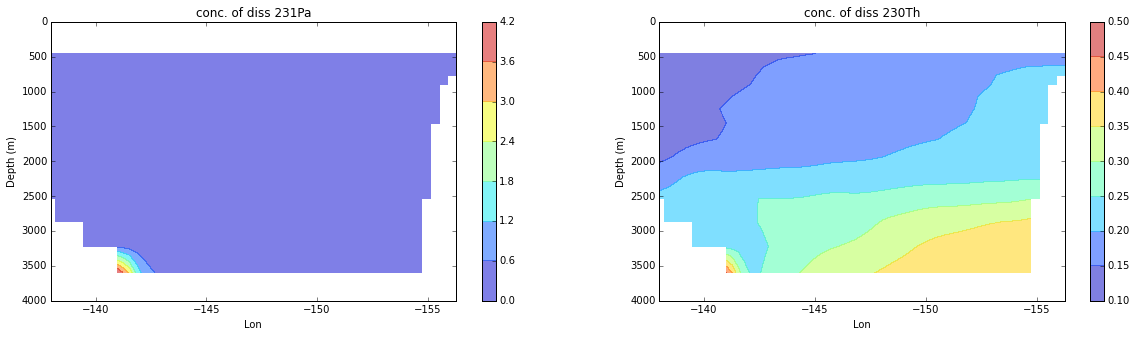

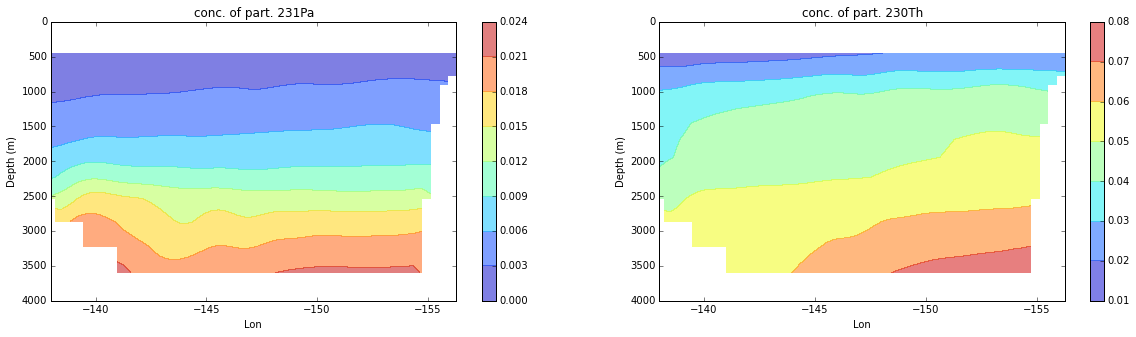

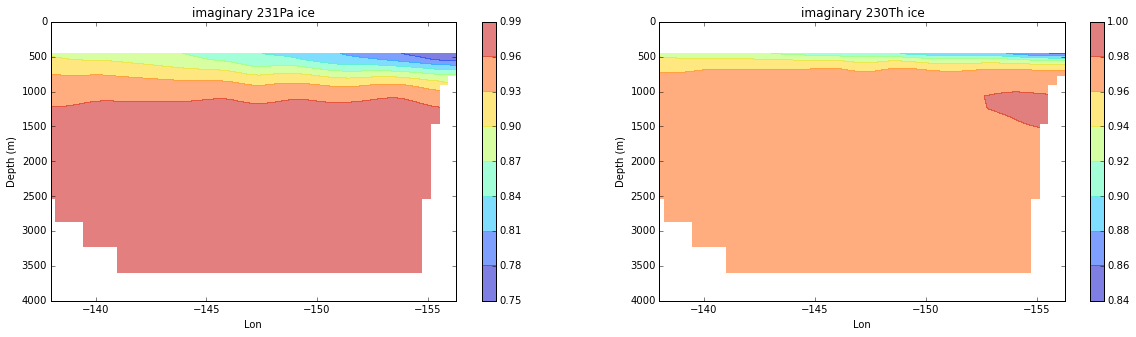

In [223]:
### * Tracers
vertical2(data1=TR_7, title1='conc. of diss 231Pa',data2=TR_8,title2='conc. of diss 230Th')
vertical2(data1=TR_9, title1='conc. of part. 231Pa',data2=TR_10,title2='conc. of part. 230Th')
vertical2(data1=TR_11, title1='imaginary 231Pa ice',data2=TR_12,title2='imaginary 230Th ice')

* Velocity 

the place where verical mixing coeff. are high is close to the place where diss. Pa goes high. 

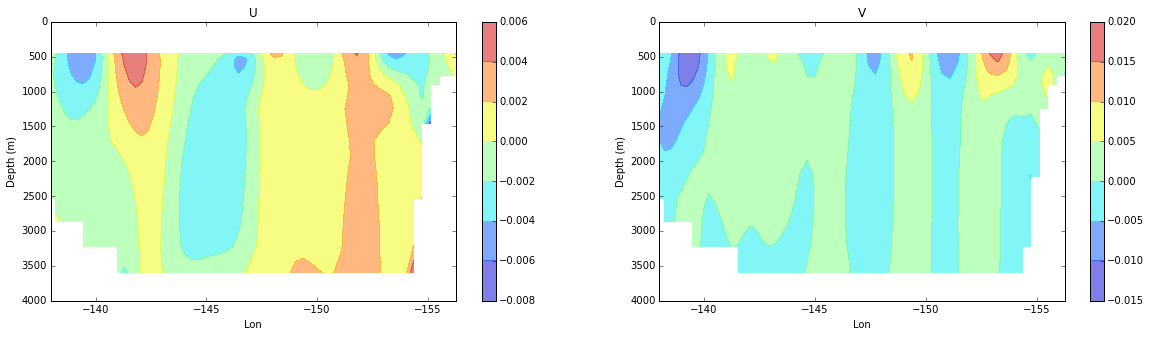

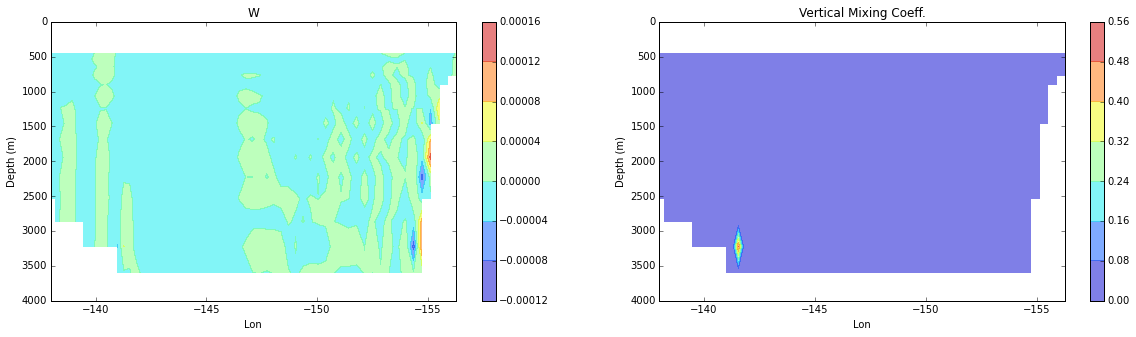

In [44]:
vertical2(data1=U, title1='U',data2=V,title2='V')
vertical2(data1=W, title1='W',data2=VM,title2='Vertical Mixing Coeff.')

* T and S

All look good to me.

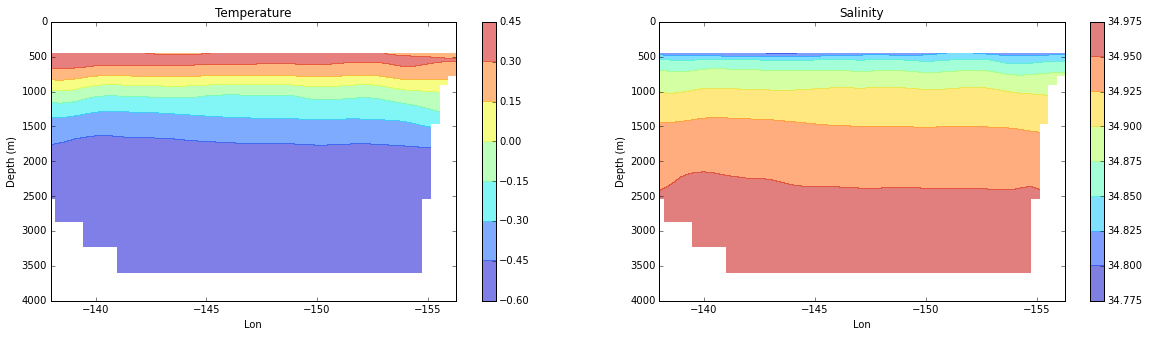

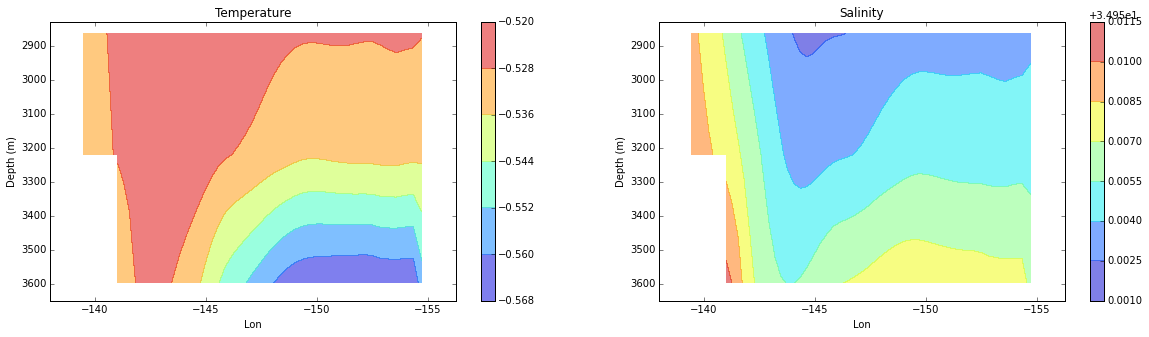

In [220]:
vertical2(data1=T, title1='Temperature',data2=S,title2='Salinity')
vertical2(data1=T, title1='Temperature',data2=S,title2='Salinity',lmin=42,lmax=46,ylim=[2830,3650])

### 2. The west edge of Canadian Basin 

* ### fse3t <----  The problem maker ?

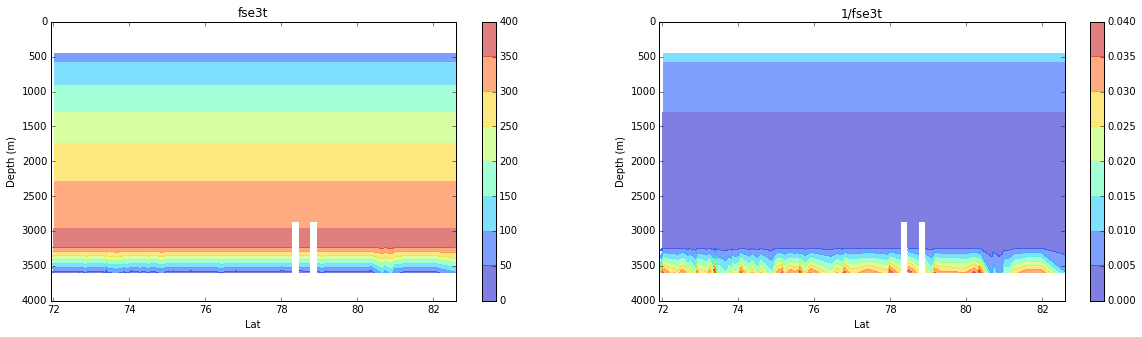

In [23]:
verticalplot(data1=e3t, title1='fse3t',data2=1/e3t,title2='1/fse3t')

* Tracers (diss/part Pa and Th)

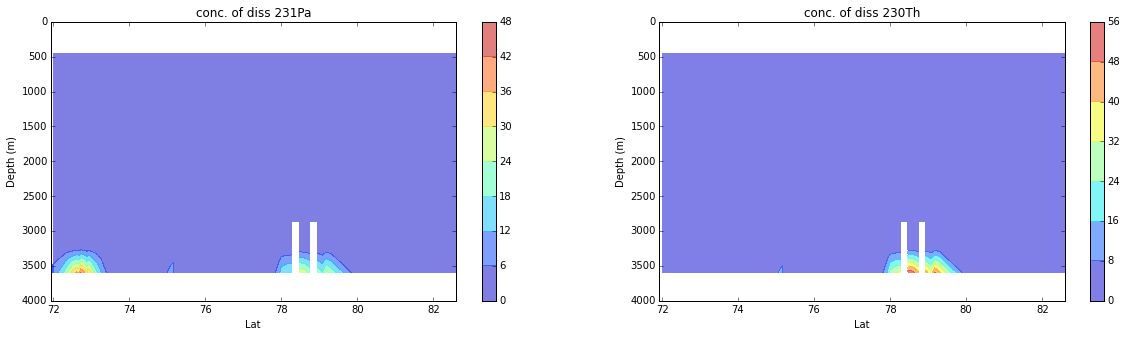

In [175]:
verticalplot(data1=TR7, title1='conc. of diss 231Pa',data2=TR8,title2='conc. of diss 230Th')

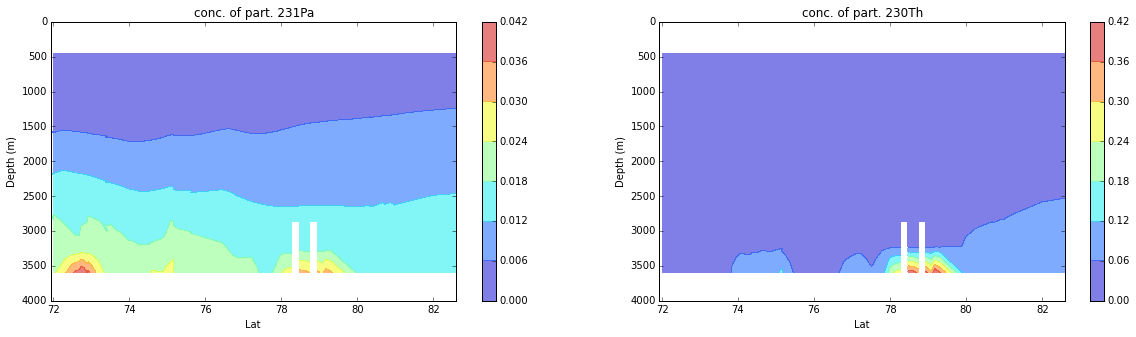

In [176]:
verticalplot(data1=TR9, title1='conc. of part. 231Pa',data2=TR10,title2='conc. of part. 230Th')

* Velocity

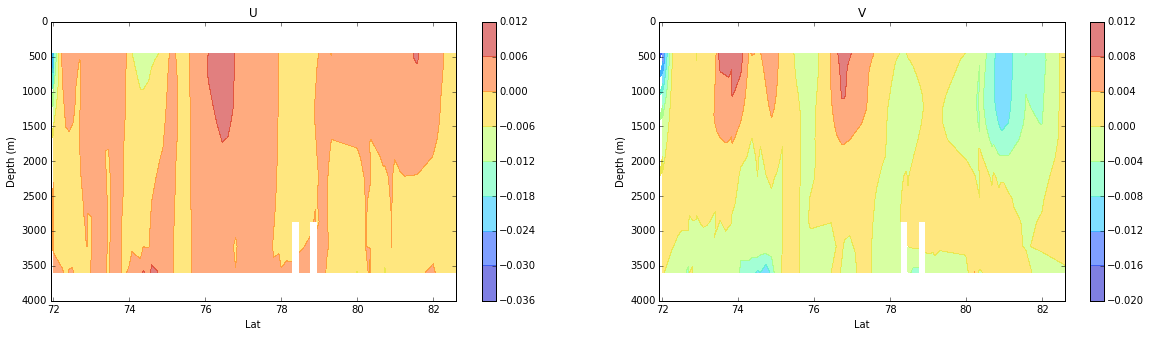

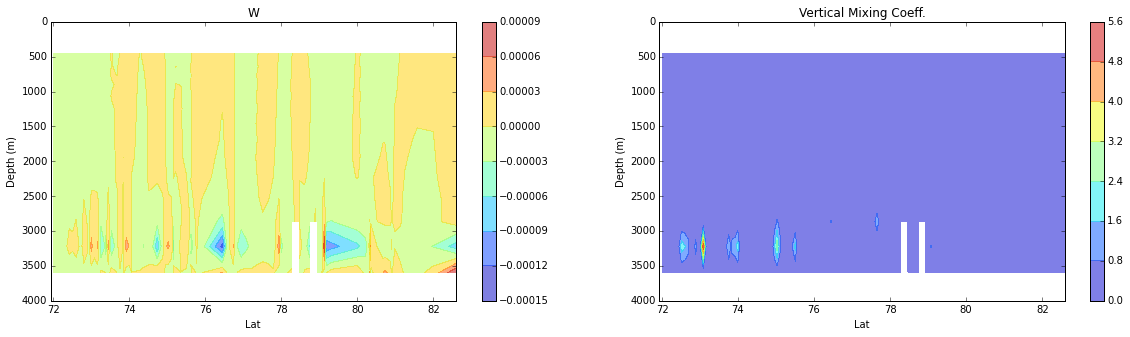

In [40]:
verticalplot(data1=uu, title1='U',data2=vv,title2='V')
verticalplot(data1=ww, title1='W',data2=ve,title2='Vertical Mixing Coeff.')

* T and S

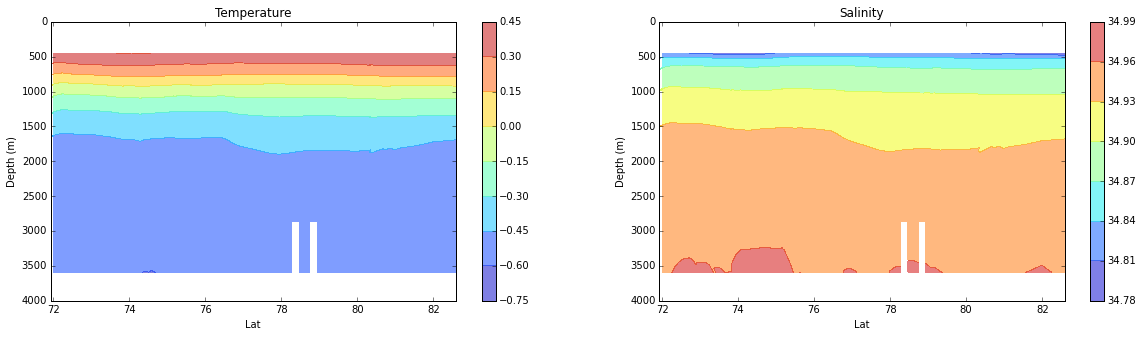

In [173]:
verticalplot(data1=TT, title1='Temperature',data2=SS,title2='Salinity')

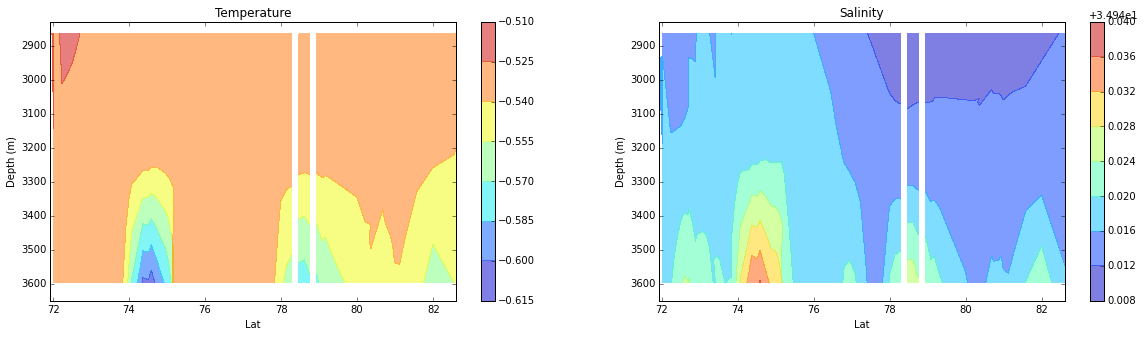

In [214]:
#zoom in 
verticalplot(data1=TT, title1='Temperature',data2=SS,title2='Salinity',lmin=42,lmax=46,ylim=[2830,3650])

* Tracers (imaginary ice for Pa and Th)

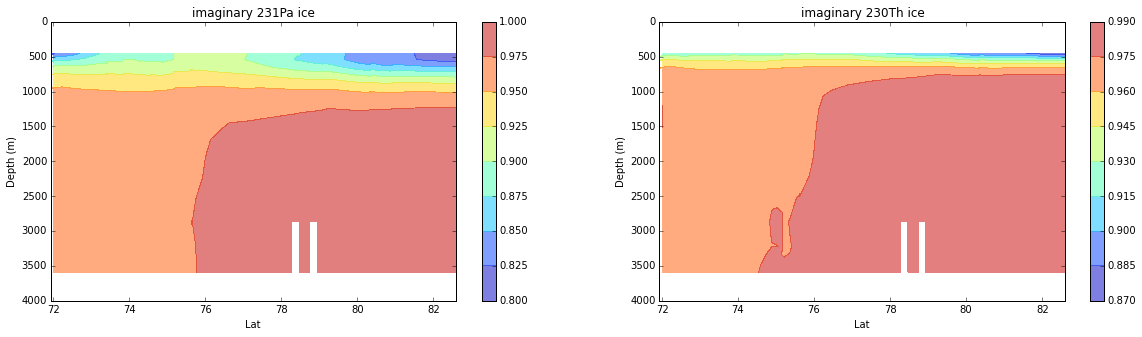

In [177]:
verticalplot(data1=TR11, title1='imaginary 231Pa ice',data2=TR12,title2='imaginary 230Th ice')

* Tracers (sinking rate/absorption rate for Pa and Th)

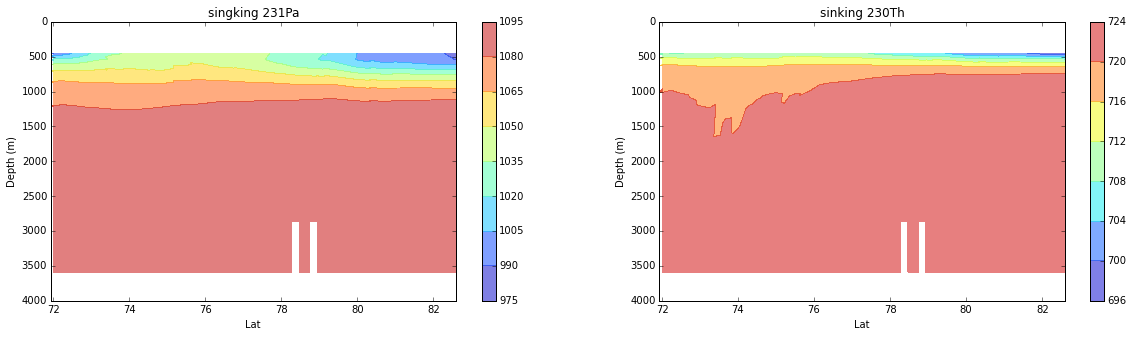

In [178]:
sPa=6.01*100*TR11+500
sTh=2.26*100*TR12+500
verticalplot(data1=sPa, title1='singking 231Pa',data2=sTh,title2='sinking 230Th')

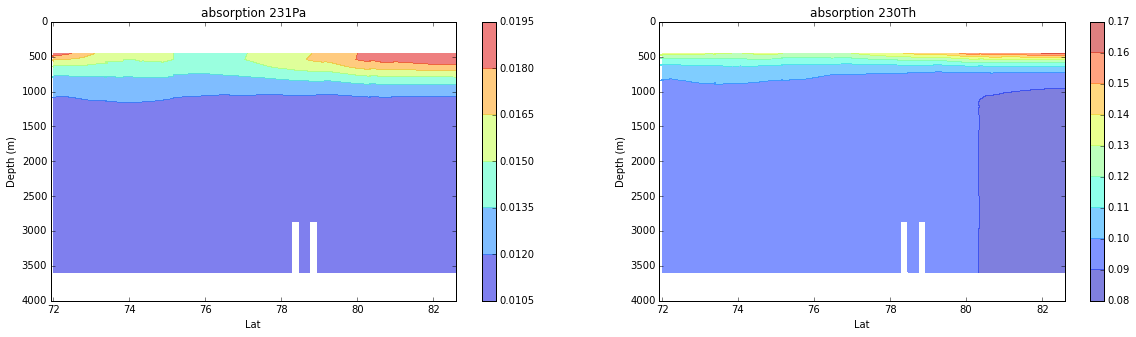

In [179]:
sPa=-0.0005*100*TR11+0.06
sTh=-0.0067*100*TR12+0.75
verticalplot(data1=sPa, title1='absorption 231Pa',data2=sTh,title2='absorption 230Th')